In [2]:
import pandas as pd 
import json
from ydata_profiling import ProfileReport
import re 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import nltk as nlt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = [] 
with open('/Users/pabloclementi/Desktop/ProyectoFinal/Google/metadata-sitios/restaurants_near_stadiums.json', 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

In [4]:
# Pasar a dataframe data 
df_rest_stad = pd.DataFrame(data)

In [9]:
df_rest_stad.describe()

latitude    longitude   avg_rating  num_of_reviews  review_rating
count  7796.000000  7796.000000  7796.000000     7796.000000    7796.000000
mean     37.607004   -93.407160     4.334697     3482.519625       4.292586
std       5.245762    16.346259     0.293453     3896.251910       1.165663
min      25.726789  -122.946312     2.300000        3.000000       1.000000
25%      33.900492  -104.990355     4.200000     1260.000000       4.000000
50%      38.940390   -88.026210     4.400000     2375.000000       5.000000
75%      40.755215   -80.841560     4.500000     4242.000000       5.000000
max      47.712639   -71.023719     4.900000    61603.000000       5.000000

In [11]:

# Genera el informe de perfil
profile = ProfileReport(df_rest_stad, title="Informe de Restaurantes ", explorative=True)

# Para visualizar el informe en un Jupyter Notebook
profile.to_notebook_iframe()

# Para guardar el informe como un archivo HTML
profile.to_file("informe_perfil.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Resumen del DataFrame
df_rest_stad.info()

# Valores nulos
df_rest_stad.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7796 entries, 0 to 7795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stadium         7796 non-null   object 
 1   name            7796 non-null   object 
 2   address         7796 non-null   object 
 3   gmap_id         7796 non-null   object 
 4   latitude        7796 non-null   float64
 5   longitude       7796 non-null   float64
 6   avg_rating      7796 non-null   float64
 7   num_of_reviews  7796 non-null   int64  
 8   url             7796 non-null   object 
 9   review_author   7796 non-null   object 
 10  review_rating   7796 non-null   int64  
 11  review_text     7796 non-null   object 
 12  review_time     7796 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 791.9+ KB


stadium           0
name              0
address           0
gmap_id           0
latitude          0
longitude         0
avg_rating        0
num_of_reviews    0
url               0
review_author     0
review_rating     0
review_text       0
review_time       0
dtype: int64

In [16]:
df_rest_stad.describe()

latitude    longitude   avg_rating  num_of_reviews  review_rating
count  7796.000000  7796.000000  7796.000000     7796.000000    7796.000000
mean     37.607004   -93.407160     4.334697     3482.519625       4.292586
std       5.245762    16.346259     0.293453     3896.251910       1.165663
min      25.726789  -122.946312     2.300000        3.000000       1.000000
25%      33.900492  -104.990355     4.200000     1260.000000       4.000000
50%      38.940390   -88.026210     4.400000     2375.000000       5.000000
75%      40.755215   -80.841560     4.500000     4242.000000       5.000000
max      47.712639   -71.023719     4.900000    61603.000000       5.000000

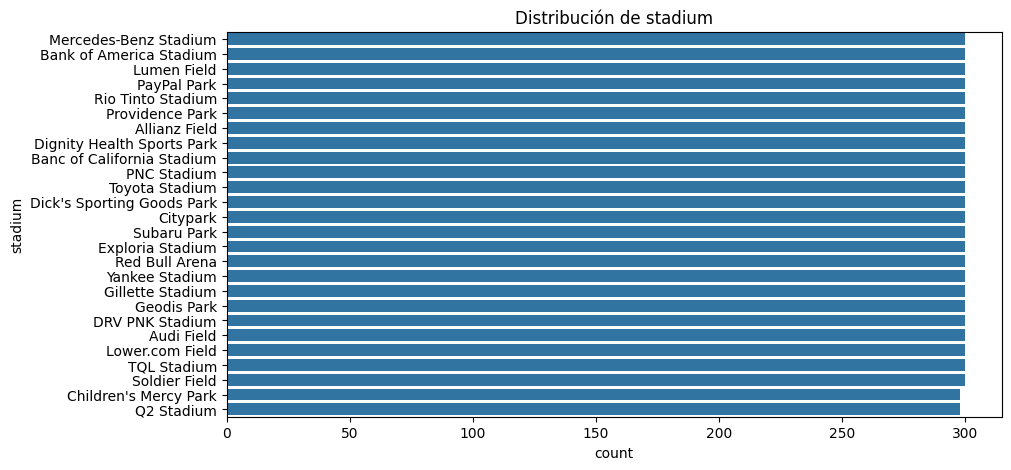

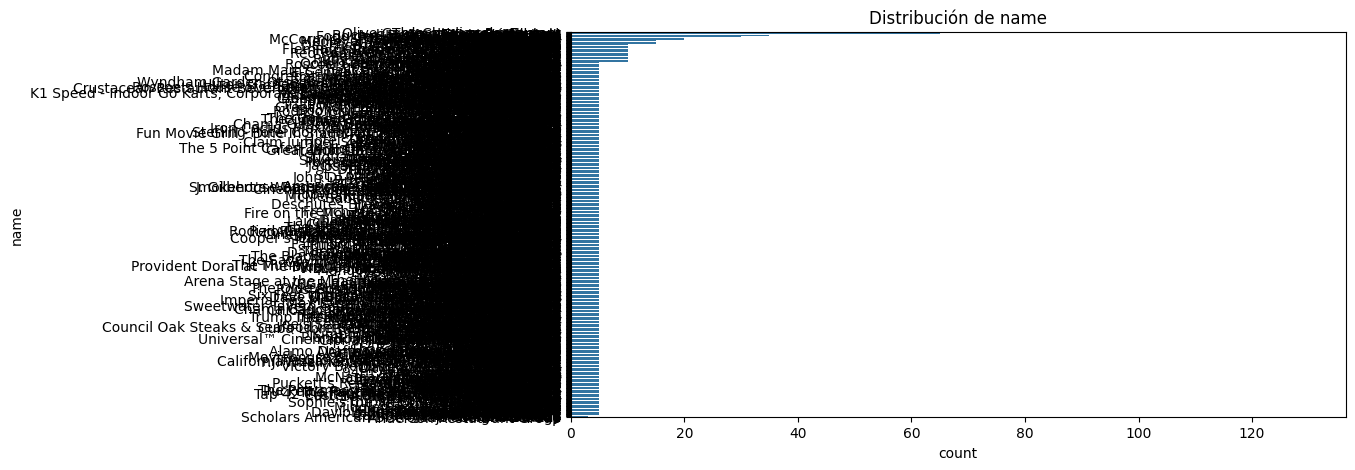

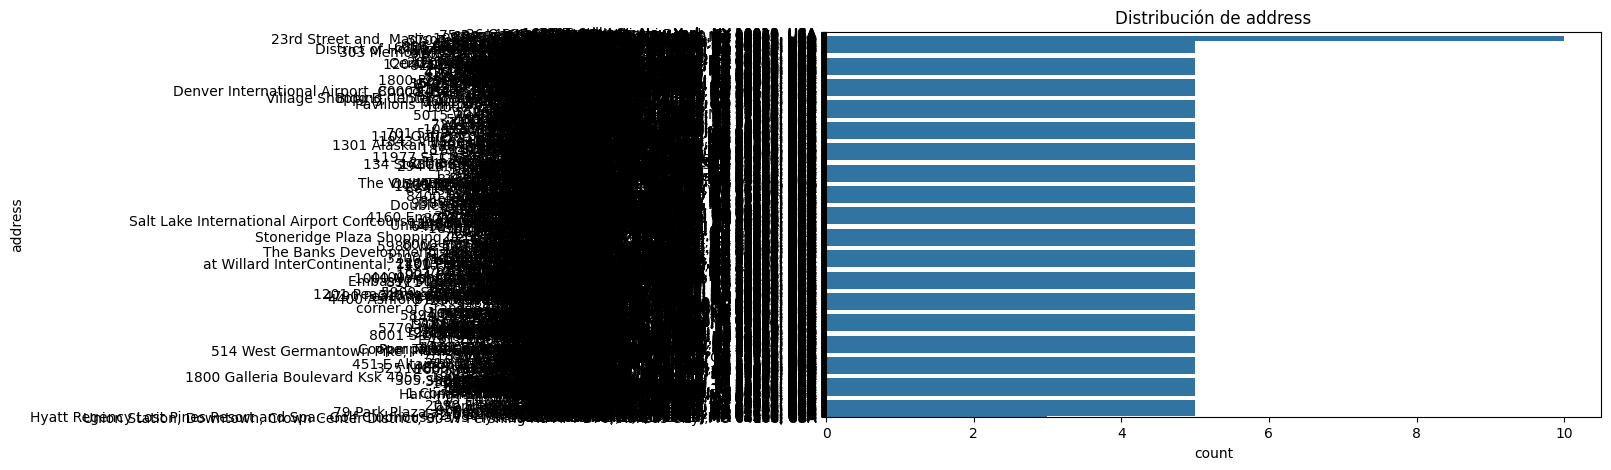

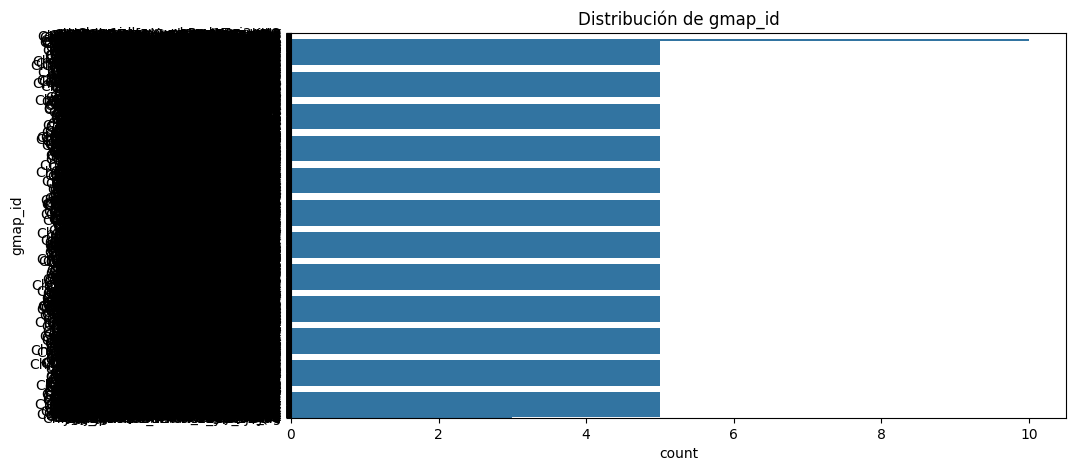

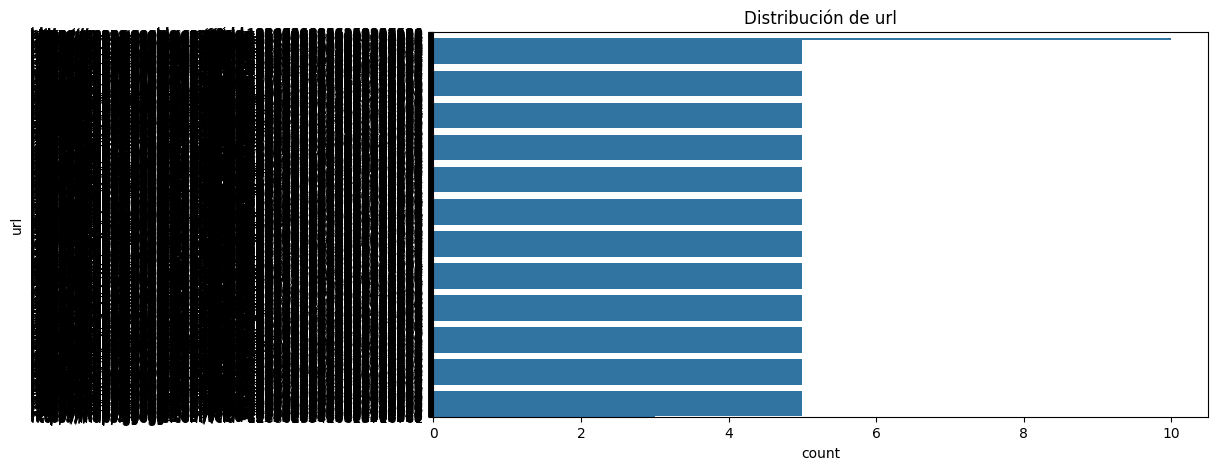

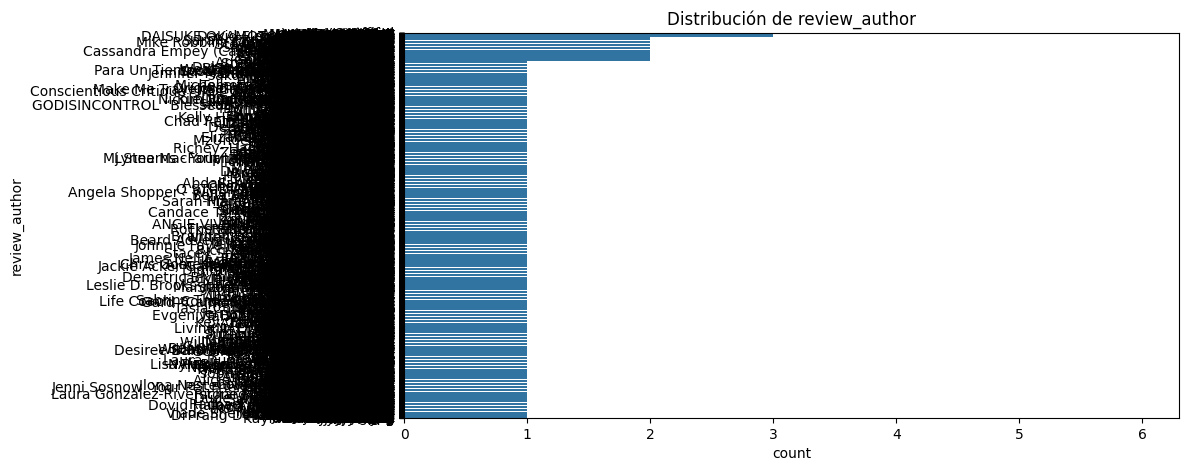

Font 'default' does not have a glyph for '\u2b50' [U+2b50], substituting with a dummy symbol.


ValueError: 
Yo I just watched Deadpool & Wolverine! And my dumb a$$ for got the limited edition cup ☝️🤓 and I went back to the theater to see if I could get it back lol and one the employees named Rain was so helpful and helped me get a new one. I’m not saying they’ll do this for everyone but man it felt good being helped like this! Thanks again to her and the manager. (I didn’t get his name) (I was lost in his eyes) (I mean her eyes)
                                                     ^
ParseException: Expected end of text, found '$'  (at char 53), (line:1, col:54)

<Figure size 1000x500 with 1 Axes>

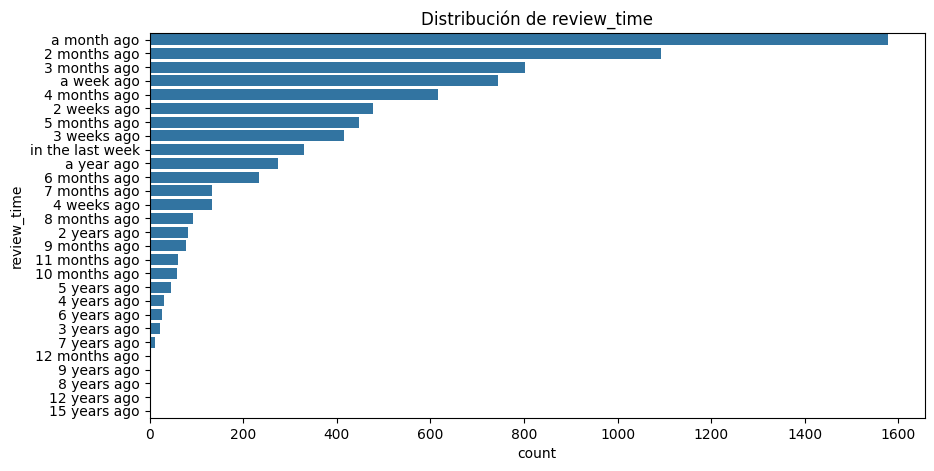

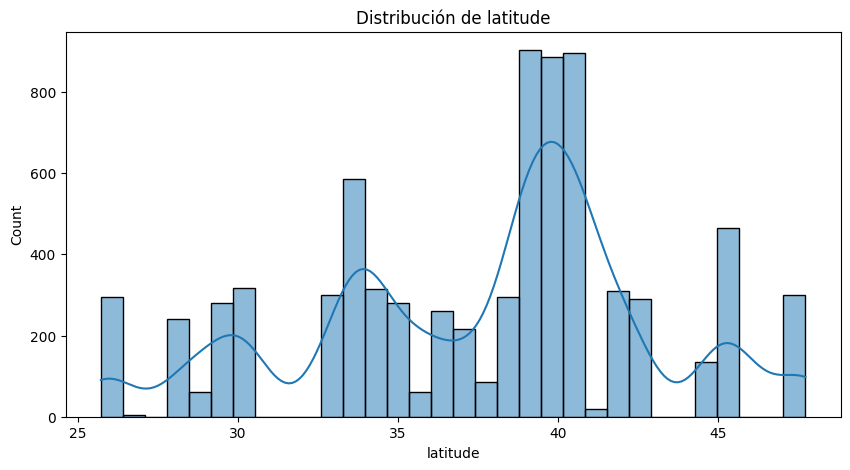

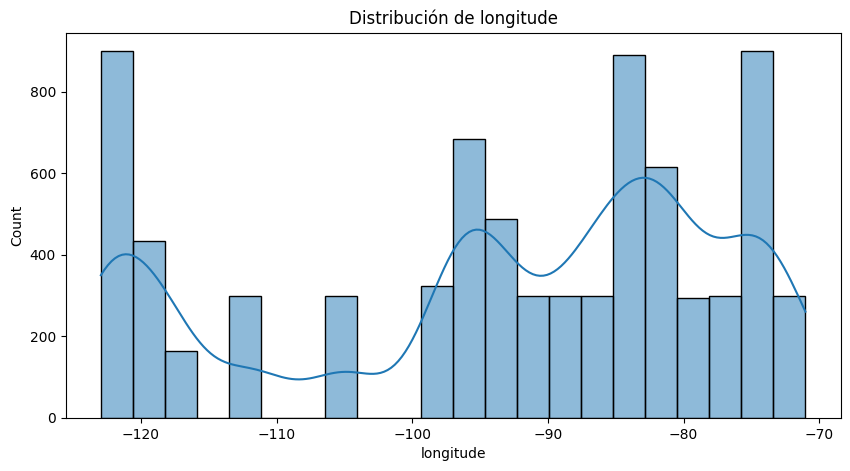

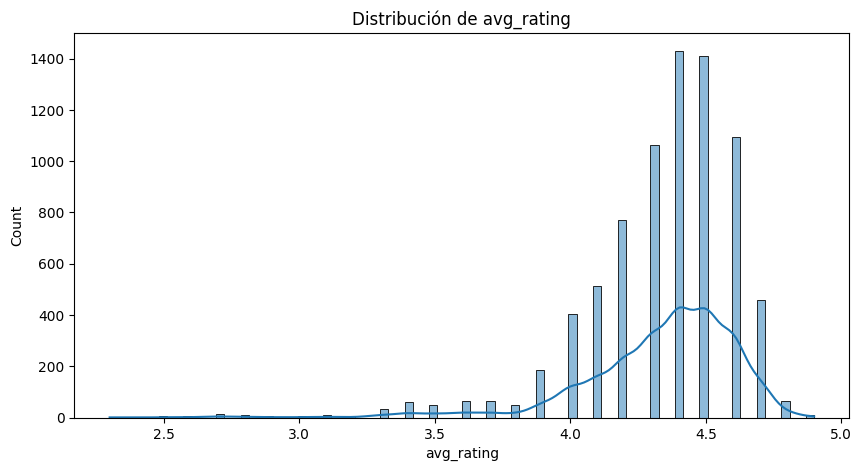

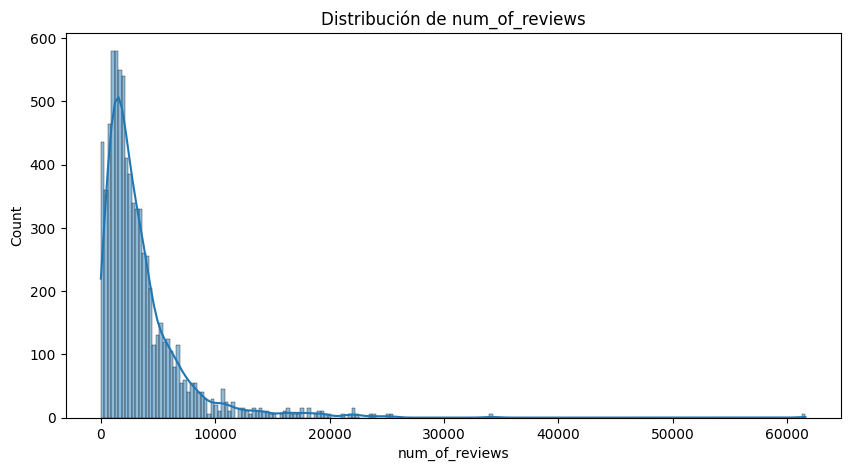

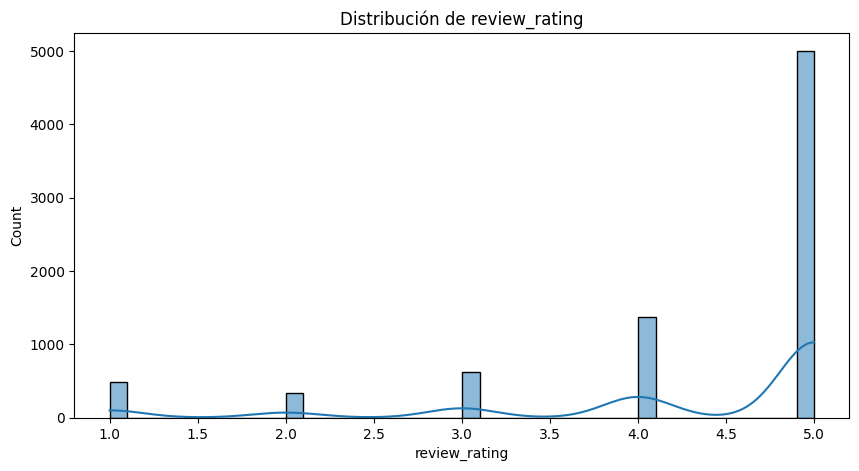

ValueError: could not convert string to float: 'Mercedes-Benz Stadium'

<Figure size 1200x800 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribución de variables categóricas
categorical_columns = df_rest_stad.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df_rest_stad[column], order=df_rest_stad[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.show()

# Distribución de variables numéricas
numerical_columns = df_rest_stad.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_rest_stad[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Mapa de calor de correlaciones entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df_rest_stad.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

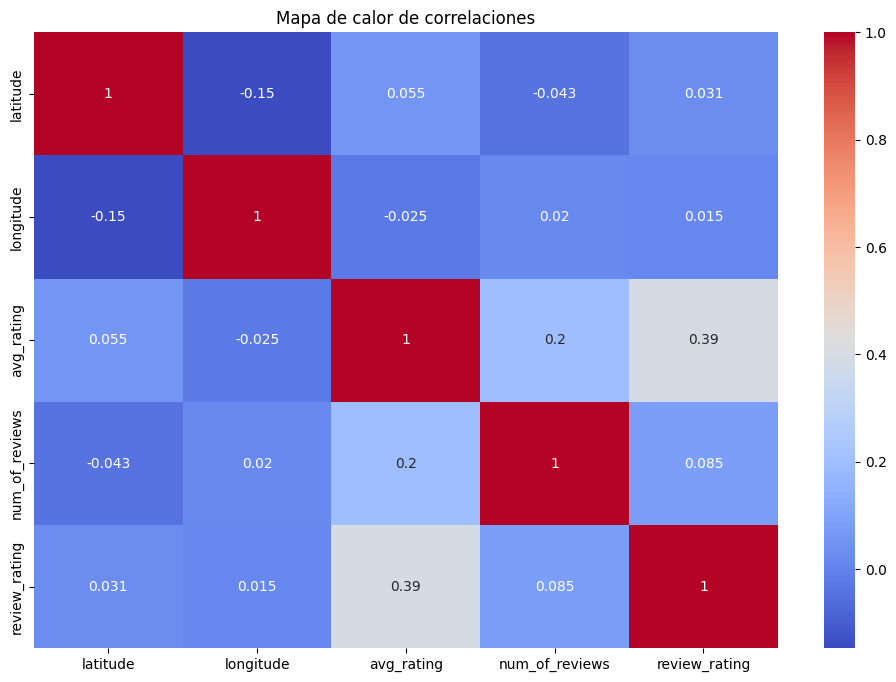

In [22]:


# Filtrar solo las columnas numéricas
numeric_df = df_rest_stad.select_dtypes(include=['float64', 'int64'])

# Generar el mapa de calor de correlaciones entre las variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [6]:
pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 326.0 kB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import folium

In [9]:


# Convertir los datos a un DataFrame de pandas
df = df_rest_stad

# Crear un objeto Map centrado en Estados Unidos
us_center = [37.0902, -95.7129]  # Coordenadas aproximadas del centro de Estados Unidos
mymap = folium.Map(location=us_center, zoom_start=5)

# Agregar marcadores para cada restaurante
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# Guardar el mapa en un archivo HTML
output_path = 'restaurants_map_us.html'
mymap.save(output_path)

print(f"Mapa guardado en {output_path}")

Mapa guardado en restaurants_map_us.html


In [ ]:
import pandas as pd
import math
from shapely.geometry import Point
from shapely.ops import nearest_points

def distance_km(lat1, lon1, lat2, lon2):
    """Calcula la distancia en kilómetros entre dos puntos dados por latitud y longitud usando la fórmula de Haversine."""
    R = 6371  # Radio de la Tierra en kilómetros
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2)  2 +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2)  2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

def registros_cerca_de_estadios(registros, estadios, distancia_km=10):
    """Filtra todos los registros que están a distancia_km de cada uno de los estadios."""
    registros_filtrados = pd.DataFrame()

    for estadio in estadios:
        lat_estadio = estadio['lat']
        lon_estadio = estadio['lng']

#Filtrar registros dentro del radio de distancia del estadio
        registros_cercanos = registros[
            registros.apply(lambda row: distance_km(row['latitude'], row['longitude'], lat_estadio, lon_estadio) <= distancia_km, axis=1)
        ]

#Agregar los registros filtrados a un DataFrame
        registros_filtrados = pd.concat([registros_filtrados, registros_cercanos]).drop_duplicates()

    return registros_filtrados


In [ ]:
estadio_lista = [
        {"name": "Mercedes-Benz Stadium", "lat": 33.7575, "lng": -84.3963},
        {"name": "Bank of America Stadium", "lat": 35.2258, "lng": -80.8462},
        {"name": "Soldier Field", "lat": 41.8623, "lng": -87.6167},
        {"name": "TQL Stadium", "lat": 39.1030, "lng": -84.5164},
        {"name": "Lower.com Field", "lat": 39.9636, "lng": -82.9988},
        {"name": "Audi Field", "lat": 38.8737, "lng": -77.0020},
        {"name": "DRV PNK Stadium", "lat": 26.0820, "lng": -80.2526},
        {"name": "Geodis Park", "lat": 36.1456, "lng": -86.7998},
        {"name": "Gillette Stadium", "lat": 42.0909, "lng": -71.2600},
        {"name": "Yankee Stadium", "lat": 40.8296, "lng": -73.9262},
        {"name": "Red Bull Arena", "lat": 40.7429, "lng": -74.1745},
        {"name": "Exploria Stadium", "lat": 28.5428, "lng": -81.3792},
        {"name": "Subaru Park", "lat": 39.8473, "lng": -75.3613},
        {"name": "Q2 Stadium", "lat": 30.2970, "lng": -97.7085},
        {"name": "Dick's Sporting Goods Park", "lat": 39.8056, "lng": -104.8771},
        {"name": "Toyota Stadium", "lat": 33.1531, "lng": -96.8208},
        {"name": "PNC Stadium", "lat": 29.7464, "lng": -95.3600},
        {"name": "Banc of California Stadium", "lat": 34.0164, "lng": -118.2814},
        {"name": "Dignity Health Sports Park", "lat": 33.8654, "lng": -118.2201},
        {"name": "Allianz Field", "lat": 44.9790, "lng": -93.2260},
        {"name": "Providence Park", "lat": 45.5215, "lng": -122.6768},
        {"name": "Rio Tinto Stadium", "lat": 40.5601, "lng": -111.8888},
        {"name": "PayPal Park", "lat": 37.3323, "lng": -121.9050},
        {"name": "Lumen Field", "lat": 47.5951, "lng": -122.3316},
        {"name": "Children's Mercy Park", "lat": 39.0972, "lng": -94.8410},
        {"name": "Citypark", "lat": 38.6136, "lng": -90.2084}]

In [ ]:
# Filtrar registros que están a 10 km de al menos uno de los estadios
registros_cercanos = registros_cerca_de_estadios(df, estadio_lista, distancia_km=10)

print(registros_cercanos)